<a href="https://colab.research.google.com/github/tooruui39/stock-project/blob/main/stock_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive 

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
myfolder = "drive/My Drive/stock-project/"

In [4]:
import pandas as pd
import numpy as np
import requests
import lxml

In [21]:
url = "https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20220101&stockNo=2330"

In [22]:
data = pd.read_html(requests.get(url).text)[0]
data.head()

111年01月 2330 台積電 各日成交資訊                                                     \
                       日期      成交股數         成交金額    開盤價    最高價    最低價    收盤價   
0               111/01/03  73703302  46249716919  619.0  632.0  618.0  631.0   
1               111/01/04  90945643  59188199534  645.0  656.0  644.0  656.0   
2               111/01/05  72505550  47582832784  669.0  669.0  646.0  650.0   
3               111/01/06  57490736  36817638522  638.0  646.0  636.0  644.0   
4               111/01/07  39847766  25358237656  643.0  646.0  632.0  634.0   

                 
   漲跌價差    成交筆數  
0  16.0   88508  
1  25.0  106409  
2  -6.0   64712  
3  -6.0   53430  
4 -10.0   44497

In [23]:
data.columns = data.columns.droplevel(0)
data.columns

Index(['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'], dtype='object')

In [24]:
data.shape

(18, 9)

In [25]:
dates = [20220201, 20220301, 20220401, 20220501, 20220601, 20220701, 20220801, 20220901, 20221001]
stockNo = 2330
url_template = "https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date={}&stockNo={}"

dummy = pd.DataFrame()

for date in dates :
    url = url_template.format(date, stockNo)
    file_name = "{}_{}.csv".format(stockNo, date)
    
    dummy = pd.read_html(requests.get(url).text)[0]
    dummy.columns = dummy.columns.droplevel(0)
    data = data.append(dummy)

data.shape

(202, 9)

In [26]:
data.describe()

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,成交筆數
count,2.020000e+02,2.020000e+02,202.000000,202.000000,202.000000,202.000000,202.000000
mean,3.823485e+07,2.029758e+10,528.858911,532.804455,524.784653,528.504950,57461.841584
std,1.798191e+07,1.057575e+10,71.380671,71.573520,71.328575,71.943334,46396.606742
min,1.025437e+07,5.208472e+09,370.500000,379.000000,370.000000,371.000000,11664.000000
25%,2.492746e+07,1.326236e+10,488.125000,492.625000,485.125000,487.125000,28593.250000
50%,3.493875e+07,1.796064e+10,520.500000,524.000000,518.500000,520.000000,42375.500000
75%,4.495156e+07,2.423369e+10,578.000000,581.750000,575.000000,577.500000,69915.250000
max,1.098429e+08,6.609448e+10,685.000000,688.000000,678.000000,683.000000,297917.000000


In [27]:
data.head()

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,111/01/03,73703302,46249716919,619.0,632.0,618.0,631.0,16.0,88508
1,111/01/04,90945643,59188199534,645.0,656.0,644.0,656.0,25.0,106409
2,111/01/05,72505550,47582832784,669.0,669.0,646.0,650.0,-6.0,64712
3,111/01/06,57490736,36817638522,638.0,646.0,636.0,644.0,-6.0,53430
4,111/01/07,39847766,25358237656,643.0,646.0,632.0,634.0,-10.0,44497


In [28]:
data.tail()

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
15,111/10/25,81173913,30515958539,380.0,382.5,371.0,371.0,-16.0,155200
16,111/10/26,61440878,23045141097,370.5,379.0,370.0,376.0,5.0,46073
17,111/10/27,47160778,18190840150,384.5,389.0,382.5,385.5,9.5,37777
18,111/10/28,44691746,16923109361,379.5,382.0,375.0,379.5,-6.0,48116
19,111/10/31,40598928,15721543079,386.0,390.0,381.0,390.0,10.5,32816


In [29]:
df = data.drop(['成交金額','漲跌價差','成交筆數'], axis=1)
df.rename(columns = {'日期':'Date','成交股數':'Volume', '開盤價':'Open', '最高價':'High', '最低價':'Low', '收盤價':'Close'}, inplace = True)
df.columns

Index(['Date', 'Volume', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [30]:
df['Date']

0     111/01/03
1     111/01/04
2     111/01/05
3     111/01/06
4     111/01/07
        ...    
15    111/10/25
16    111/10/26
17    111/10/27
18    111/10/28
19    111/10/31
Name: Date, Length: 202, dtype: object

In [31]:
d = df['Date']
d.iloc[0][0:3]
for i in range(len(d)):
    d.iloc[i]=d.iloc[i].replace(d.iloc[i][0:3], str(int(d.iloc[i][0:3]) + 1911))
df['Date']=pd.to_datetime(d,format='%Y/%m/%d')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [32]:
df['Date']

0    2022-01-03
1    2022-01-04
2    2022-01-05
3    2022-01-06
4    2022-01-07
        ...    
15   2022-10-25
16   2022-10-26
17   2022-10-27
18   2022-10-28
19   2022-10-31
Name: Date, Length: 202, dtype: datetime64[ns]

In [33]:
df.head()

,Date,Volume,Open,High,Low,Close
0,2022-01-03,73703302,619.0,632.0,618.0,631.0
1,2022-01-04,90945643,645.0,656.0,644.0,656.0
2,2022-01-05,72505550,669.0,669.0,646.0,650.0
3,2022-01-06,57490736,638.0,646.0,636.0,644.0
4,2022-01-07,39847766,643.0,646.0,632.0,634.0


In [43]:
df.to_csv(myfolder + "2330.csv", index=False)

In [52]:
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

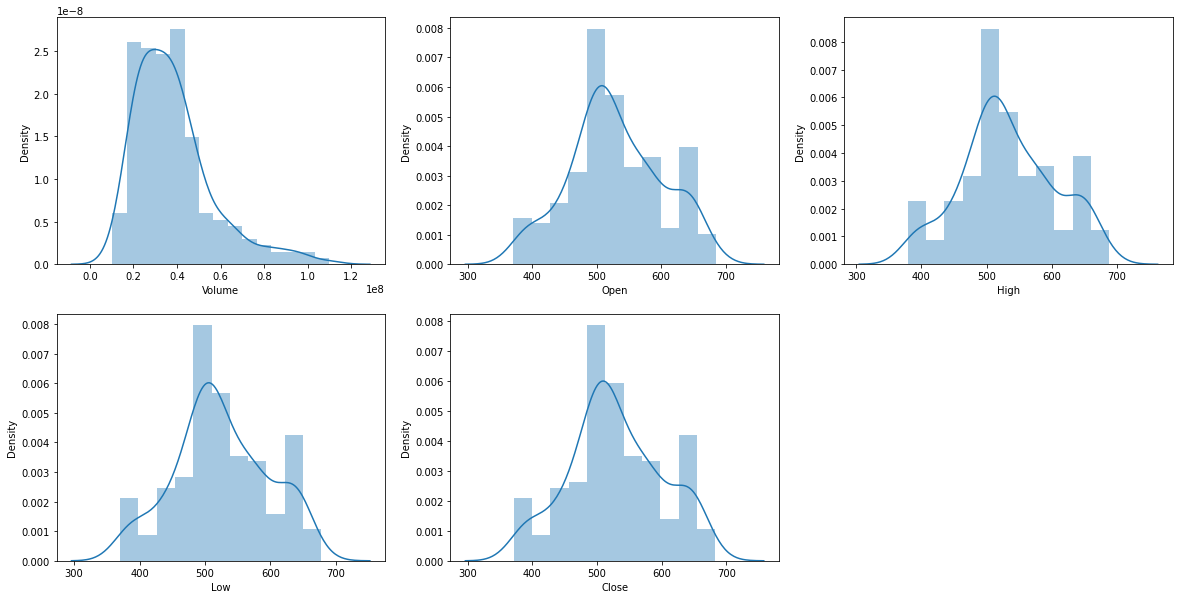

In [53]:
features = ['Volume', 'Open', 'High', 'Low', 'Close']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

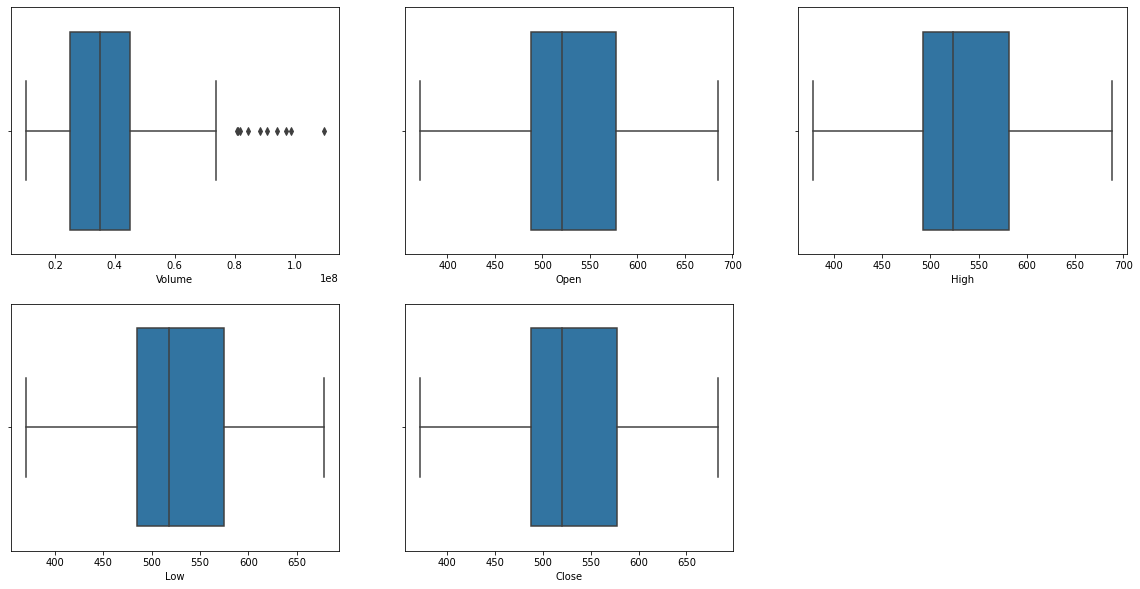

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [54]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['10DMA'] = df['Close'].rolling(10).mean().fillna(method='bfill')
df['target'] = np.where(df['10DMA'].shift(-1) < df['10DMA'], 1, 0)

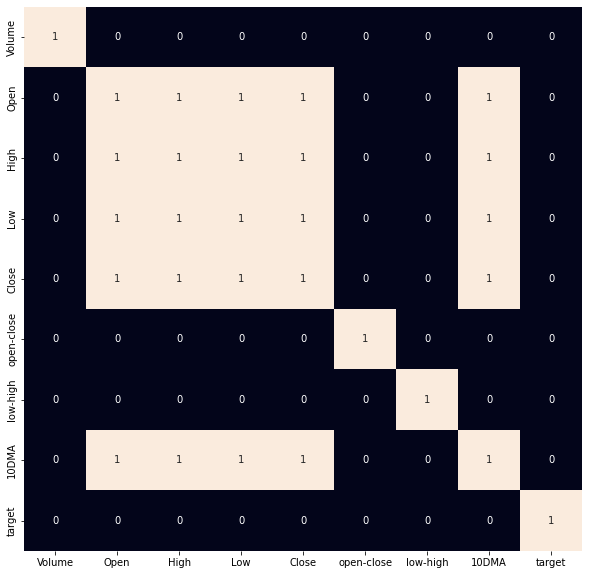

In [ ]:
plt.figure(figsize=(10, 10))
 
sb.heatmap(df.corr() > 0.5, annot=True, cbar=False)
plt.show()

In [55]:
features = df[['open-close', 'low-high', '10DMA']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=234)
print(X_train.shape, X_valid.shape)

(181, 3) (21, 3)


In [56]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.6832474925454053
Validation Accuracy :  0.6020408163265306

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.7413933315261588
Validation Accuracy :  0.42857142857142855

XGBClassifier() : 
Training Accuracy :  0.9753320683111955
Validation Accuracy :  0.3979591836734694



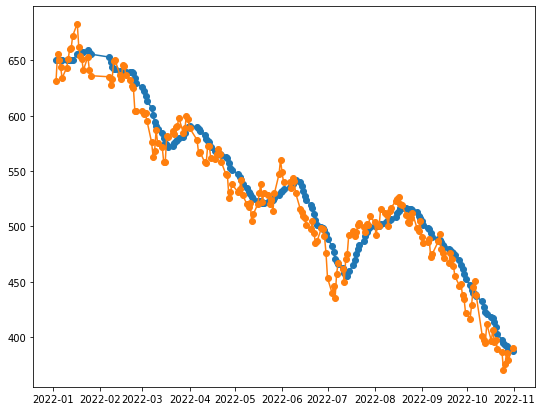

In [60]:
x=df['Date']
y=df[['10DMA','Close']]

plt.plot(x,y,marker="o")
plt.gcf().set_size_inches(9, 7)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


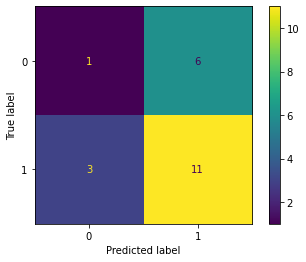

In [58]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()